# Importing Libraries

In [1]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
import numpy as np

sns.set()
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf

print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [4]:
import tensorflow as tf

# Creates a tensor on GPU if available, otherwise on CPU
with tf.device('/device:GPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())


TensorFlow version: 2.16.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available: False


In [6]:
import plotly.io as pio
pio.renderers.default = 'notebook'


# Download the data

In [7]:
df = pd.read_csv("../data/loan_data_set.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
NUMERICAL_FEATURES = ['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term',]

CATEGORICAL_FEATURES =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']

NUMERICAL_CATEGORICAL_FEATURES=['Credit_History']

LABEL_KEY_REG = 'LoanAmount'
LABEL_KEY_CAT = 'Loan_Status'

COLUMNS_TO_DROP=["Loan_ID"]

In [11]:
df.isnull().sum()   #checking missing Values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# filling with mode for categorical variables
for column in CATEGORICAL_FEATURES:
    df[column].fillna(df[column].mode()[0], inplace=True)

# filling with median for numerical variables
for column in NUMERICAL_FEATURES:
    df[column].fillna(df[column].median(), inplace=True)

for column in NUMERICAL_CATEGORICAL_FEATURES:
    df[column].fillna(df[column].median(), inplace=True)

# Filling missing values in the label column
df[LABEL_KEY_REG] = df[LABEL_KEY_REG].fillna(df[LABEL_KEY_REG].median())


In [13]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

In [14]:
df.isnull().sum() #rechecking missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.describe(include="all").transpose() #dataframe description

count unique        top freq         mean          std  \
Loan_ID              614    614   LP001002    1          NaN          NaN   
Gender               614      2       Male  502          NaN          NaN   
Married              614      2        Yes  401          NaN          NaN   
Dependents         614.0    NaN        NaN  NaN       0.7443     1.009623   
Education            614      2   Graduate  480          NaN          NaN   
Self_Employed        614      2         No  532          NaN          NaN   
ApplicantIncome    614.0    NaN        NaN  NaN  5403.459283  6109.041673   
CoapplicantIncome  614.0    NaN        NaN  NaN  1621.245798  2926.248369   
LoanAmount         614.0    NaN        NaN  NaN   145.752443    84.107233   
Loan_Amount_Term   614.0    NaN        NaN  NaN   342.410423    64.428629   
Credit_History     614.0    NaN        NaN  NaN     0.855049     0.352339   
Property_Area        614      3  Semiurban  233          NaN          NaN   
Loan_Status          614      2          Y  422          NaN          NaN   

                     min     25%     50%      75%      max  
Loan_ID              NaN     NaN     NaN      NaN      NaN  
Gender               NaN     NaN     NaN      NaN      NaN  
Married              NaN     NaN     NaN      NaN      NaN  
Dependents           0.0     0.0     0.0      1.0      3.0  
Education            NaN     NaN     NaN      NaN      NaN  
Self_Employed        NaN     NaN     NaN      NaN      NaN  
ApplicantIncome    150.0  2877.5  3812.5   5795.0  81000.0  
CoapplicantIncome    0.0     0.0  1188.5  2297.25  41667.0  
LoanAmount           9.0  100.25   128.0   164.75    700.0  
Loan_Amount_Term    12.0   360.0   360.0    360.0    480.0  
Credit_History       0.0     1.0     1.0      1.0      1.0  
Property_Area        NaN     NaN     NaN      NaN      NaN  
Loan_Status          NaN     NaN     NaN      NaN      NaN

In [16]:
df.Gender.value_counts() # Checking gender distribution for potential biases

Gender
Male      502
Female    112
Name: count, dtype: int64

In [17]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])

In [19]:
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[614 rows x 13 columns]

In [20]:
plt.figure(figsize=(1,2))

for feature in CATEGORICAL_FEATURES:
    fig = px.histogram(df, x=feature, color=feature)
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    fig.update_layout(title=feature)
    fig.show()


<Figure size 100x200 with 0 Axes>

### Insight: The dataset exhibits a significant gender disparity, with male applicants comprising 502 applications compared to only 112 from female applicants.

<Figure size 1000x600 with 0 Axes>

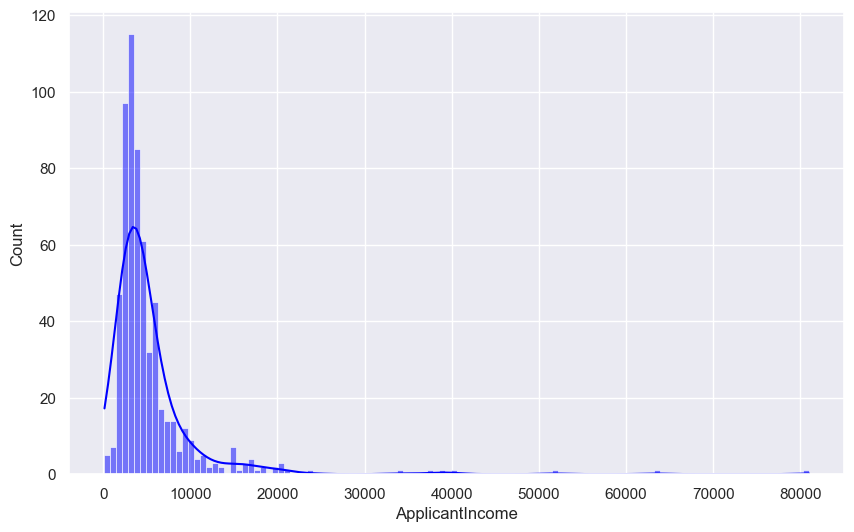

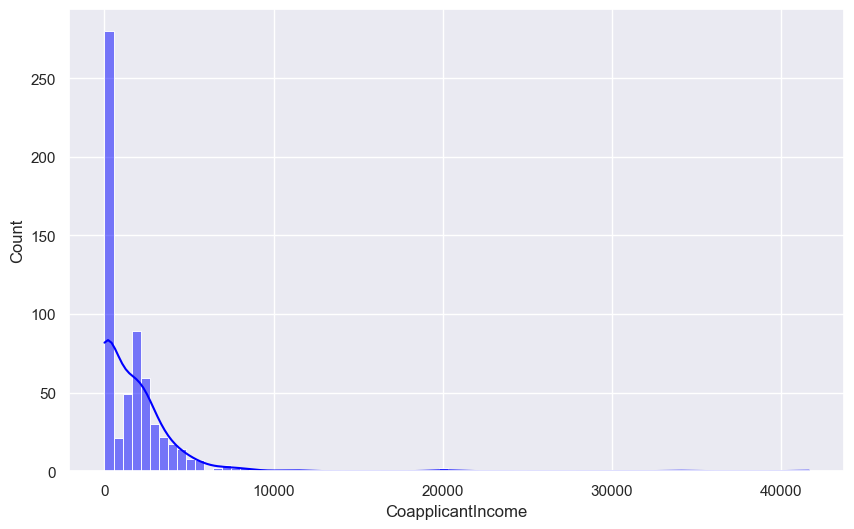

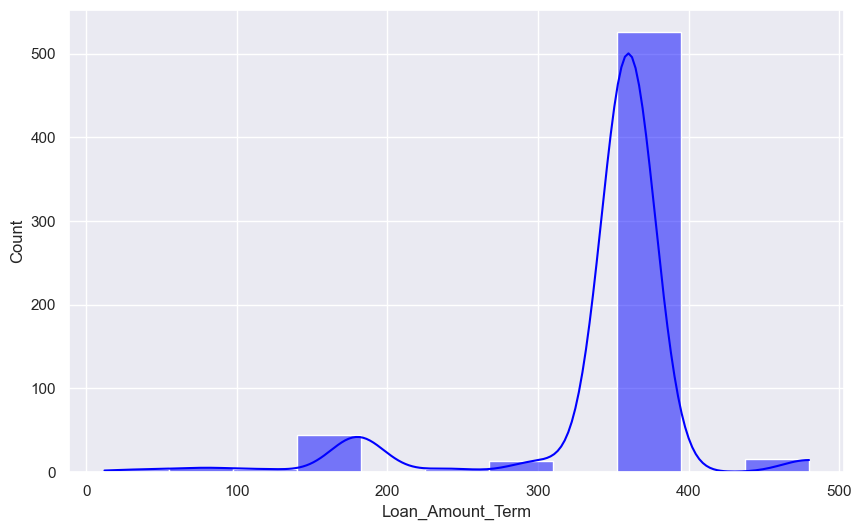

In [21]:
import plotly.figure_factory as ff

plt.figure(figsize=(10,6))

for feature in NUMERICAL_FEATURES:
    plt.figure(figsize=(10,6))
    fig0 = sns.histplot(df[feature], kde=True, color="blue")
    plt.show()

In [22]:
corr=df.corr()
corr

Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.028029 -0.016013    0.051559   0.039442   
Gender            -0.028029  1.000000  0.364569    0.172914   0.045364   
Married           -0.016013  0.364569  1.000000    0.334216   0.012304   
Dependents         0.051559  0.172914  0.334216    1.000000   0.055752   
Education          0.039442  0.045364  0.012304    0.055752   1.000000   
Self_Employed      0.032874 -0.000525  0.004489    0.056798  -0.010383   
ApplicantIncome    0.016925  0.058809  0.051708    0.118202  -0.140760   
CoapplicantIncome  0.039211  0.082912  0.075948    0.030430  -0.062290   
LoanAmount         0.036872  0.106904  0.146546    0.163103  -0.168759   
Loan_Amount_Term  -0.033028 -0.074030 -0.100912   -0.103864  -0.073928   
Credit_History    -0.030603  0.009170  0.010938   -0.040160  -0.073658   
Property_Area     -0.155416 -0.025752  0.004257   -0.000244  -0.065243   
Loan_Status        0.011773  0.017987  0.091478    0.010118  -0.085884   

                   Self_Employed  ApplicantIncome  CoapplicantIncome  \
Loan_ID                 0.032874         0.016925           0.039211   
Gender                 -0.000525         0.058809           0.082912   
Married                 0.004489         0.051708           0.075948   
Dependents              0.056798         0.118202           0.030430   
Education              -0.010383        -0.140760          -0.062290   
Self_Employed           1.000000         0.127180          -0.016100   
ApplicantIncome         0.127180         1.000000          -0.116605   
CoapplicantIncome      -0.016100        -0.116605           1.000000   
LoanAmount              0.115100         0.565181           0.189218   
Loan_Amount_Term       -0.033739        -0.046531          -0.059383   
Credit_History         -0.001550        -0.018615           0.011134   
Property_Area          -0.030860        -0.009500           0.010522   
Loan_Status            -0.003700        -0.004710          -0.059187   

                   LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID              0.036872         -0.033028       -0.030603   
Gender               0.106904         -0.074030        0.009170   
Married              0.146546         -0.100912        0.010938   
Dependents           0.163103         -0.103864       -0.040160   
Education           -0.168759         -0.073928       -0.073658   
Self_Employed        0.115100         -0.033739       -0.001550   
ApplicantIncome      0.565181         -0.046531       -0.018615   
CoapplicantIncome    0.189218         -0.059383        0.011134   
LoanAmount           1.000000          0.036960       -0.000607   
Loan_Amount_Term     0.036960          1.000000       -0.004705   
Credit_History      -0.000607         -0.004705        1.000000   
Property_Area       -0.046632         -0.076120        0.001963   
Loan_Status         -0.033214         -0.022549        0.540556   

                   Property_Area  Loan_Status  
Loan_ID                -0.155416     0.011773  
Gender                 -0.025752     0.017987  
Married                 0.004257     0.091478  
Dependents             -0.000244     0.010118  
Education              -0.065243    -0.085884  
Self_Employed          -0.030860    -0.003700  
ApplicantIncome        -0.009500    -0.004710  
CoapplicantIncome       0.010522    -0.059187  
LoanAmount             -0.046632    -0.033214  
Loan_Amount_Term       -0.076120    -0.022549  
Credit_History          0.001963     0.540556  
Property_Area           1.000000     0.032112  
Loan_Status             0.032112     1.000000

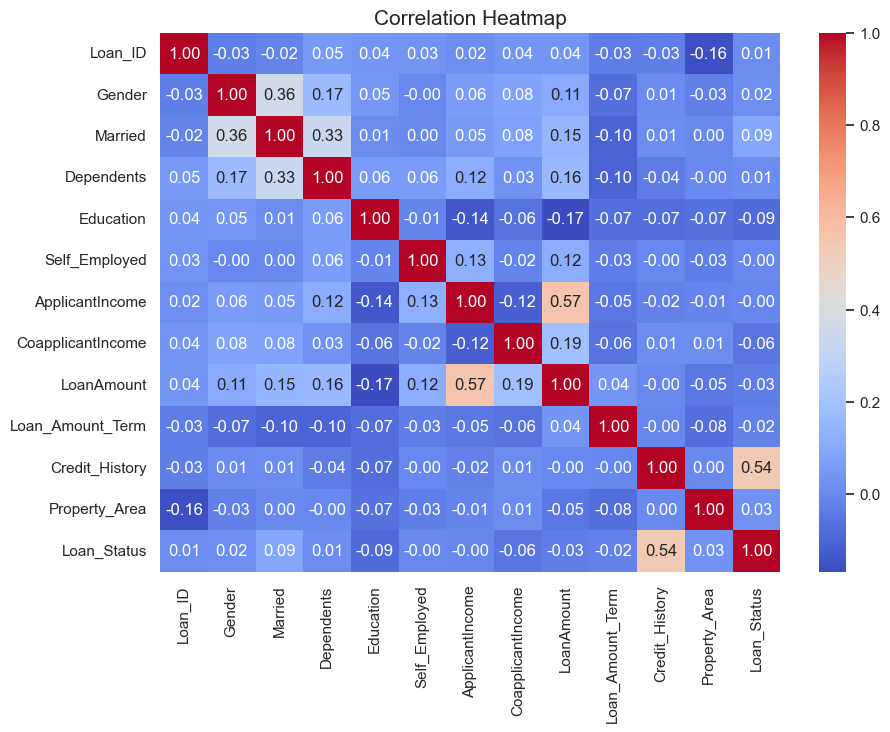

In [23]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [24]:
fig = px.histogram(df, x='LoanAmount',
                   color='Gender',
                   title='Loan Amount and Gender Distribution',
                   opacity=0.8,
                   log_y=False, # represent bars with log scale
                   text_auto=True)
fig.show()

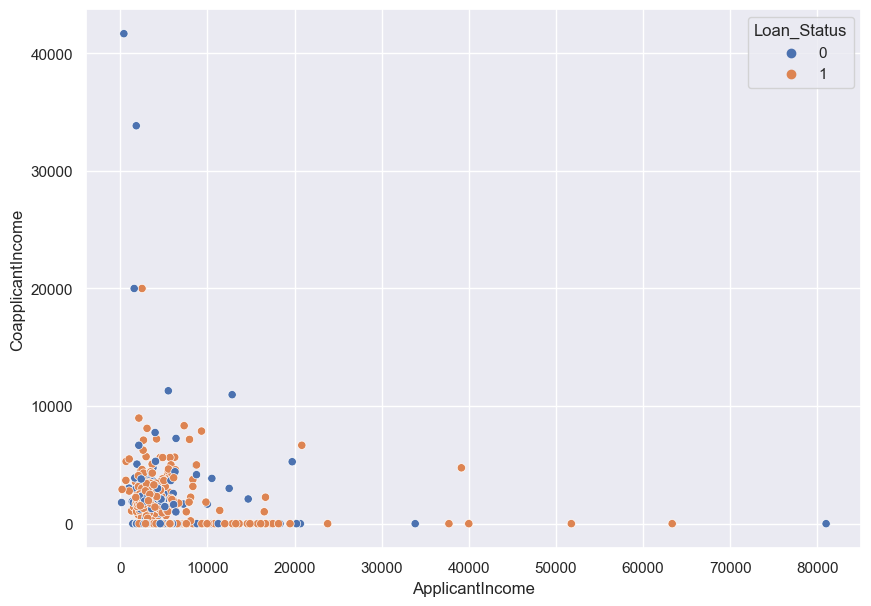

In [25]:
plt.figure(figsize = (10,7))
sns.scatterplot(data=df , x ='ApplicantIncome',y='CoapplicantIncome',hue ='Loan_Status')
plt.show()

In [26]:
fig = px.box(df, x="Education", y="ApplicantIncome",
             notched=True, # used notched shape
             title="Box plot of Education and Applicant Income",
            )
fig.show()

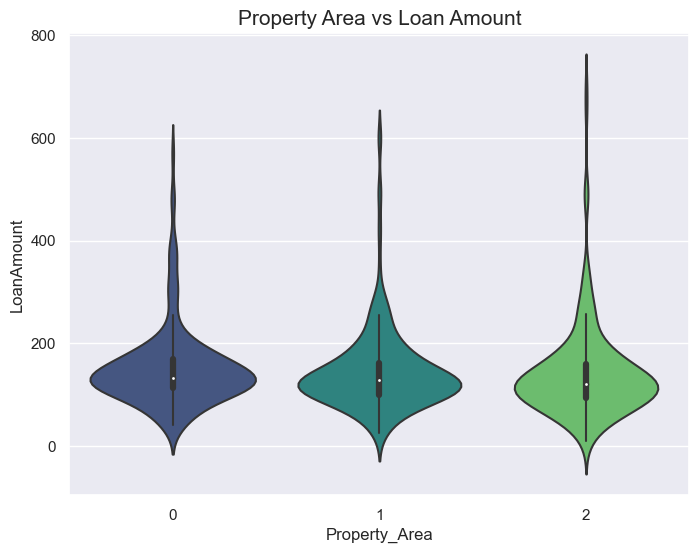

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Property_Area', y='LoanAmount', data=df, palette='viridis')
plt.title('Property Area vs Loan Amount', fontsize=15)
plt.show()

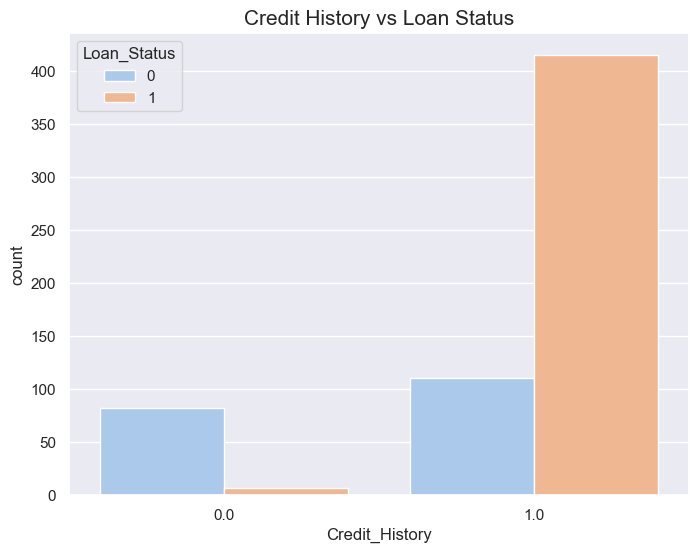

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='pastel')
plt.title('Credit History vs Loan Status', fontsize=15)
plt.show()

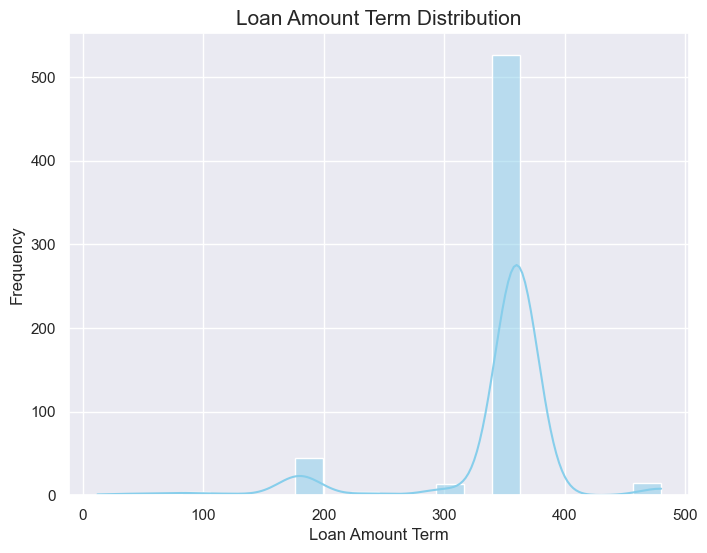

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df['Loan_Amount_Term'], bins=20, kde=True, color='skyblue')
plt.title('Loan Amount Term Distribution', fontsize=15)
plt.xlabel('Loan Amount Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\vpved\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



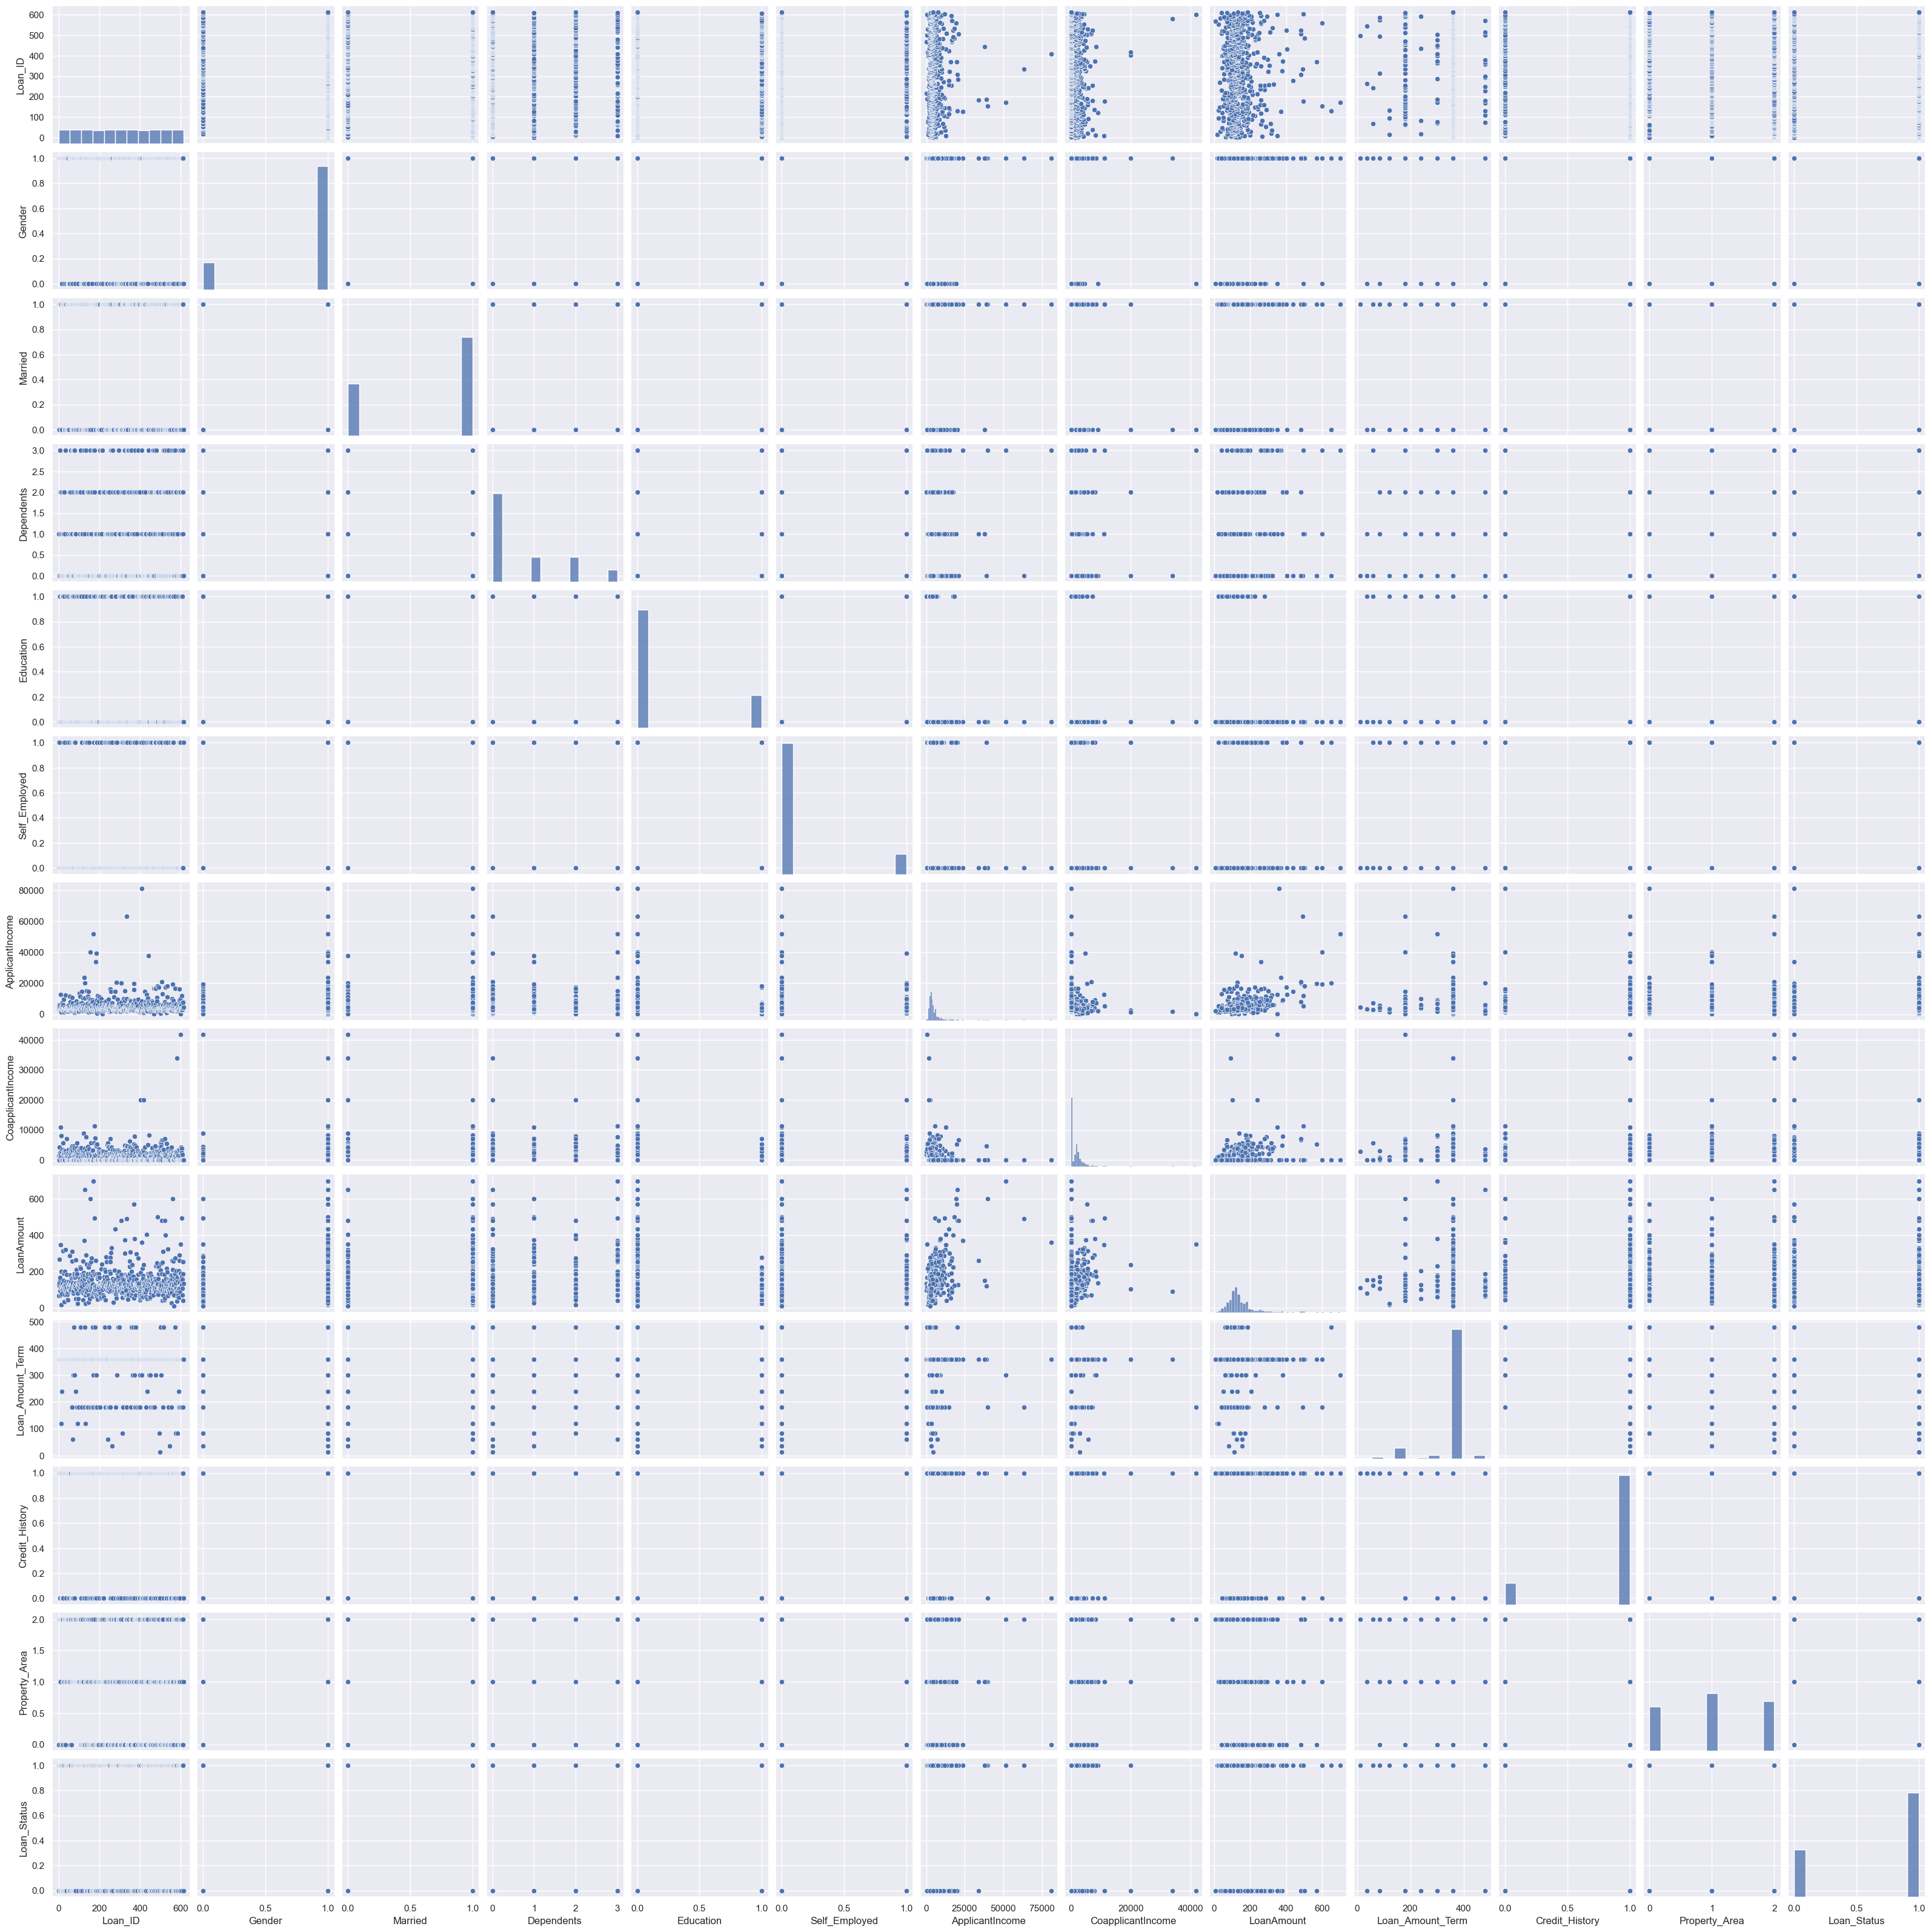

In [30]:
sns.pairplot(df)
plt.show()

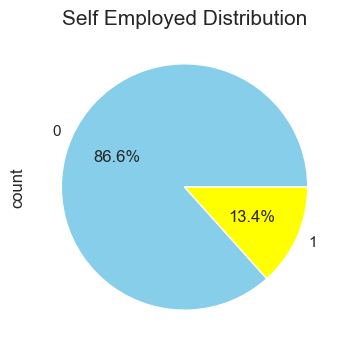

In [31]:
plt.figure(figsize=(6,4))
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'yellow'])
plt.title('Self Employed Distribution', fontsize=15)
plt.show()

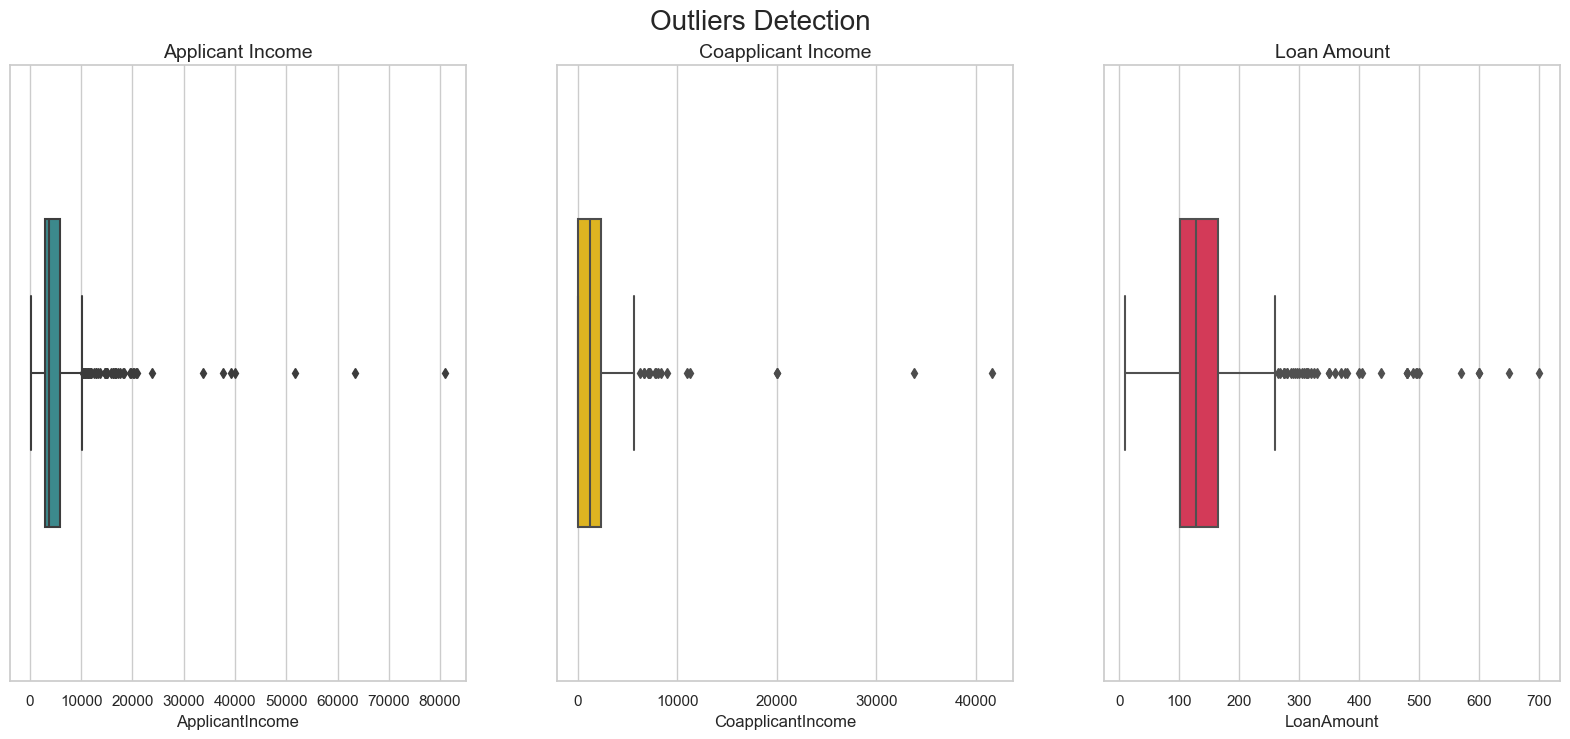

In [32]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")

colors = ["#2F9599", "#FEC601", "#EC2049"]

plt.subplot(1,3,1)
sns.boxplot(data=df, x='ApplicantIncome', color=colors[0], width=0.5)
plt.title('Applicant Income', fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(data=df, x='CoapplicantIncome', color=colors[1], width=0.5)
plt.title('Coapplicant Income', fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(data=df, x='LoanAmount', color=colors[2], width=0.5)
plt.title('Loan Amount', fontsize=14)

plt.suptitle('Outliers Detection', fontsize=20, y=0.95)

plt.show()

In [33]:
print("Before Removing the outliers", df.shape)
df = df[df['ApplicantIncome']<25000]
print("After Removing the outliers", df.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [34]:
print("Before Removing the outliers", df.shape)
df = df[df['CoapplicantIncome']<12000]
print("After Removing the outliers", df.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [35]:
print("Before Removing the outliers", df.shape)
df = df[df['LoanAmount']<400]
print("After Removing the outliers", df.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


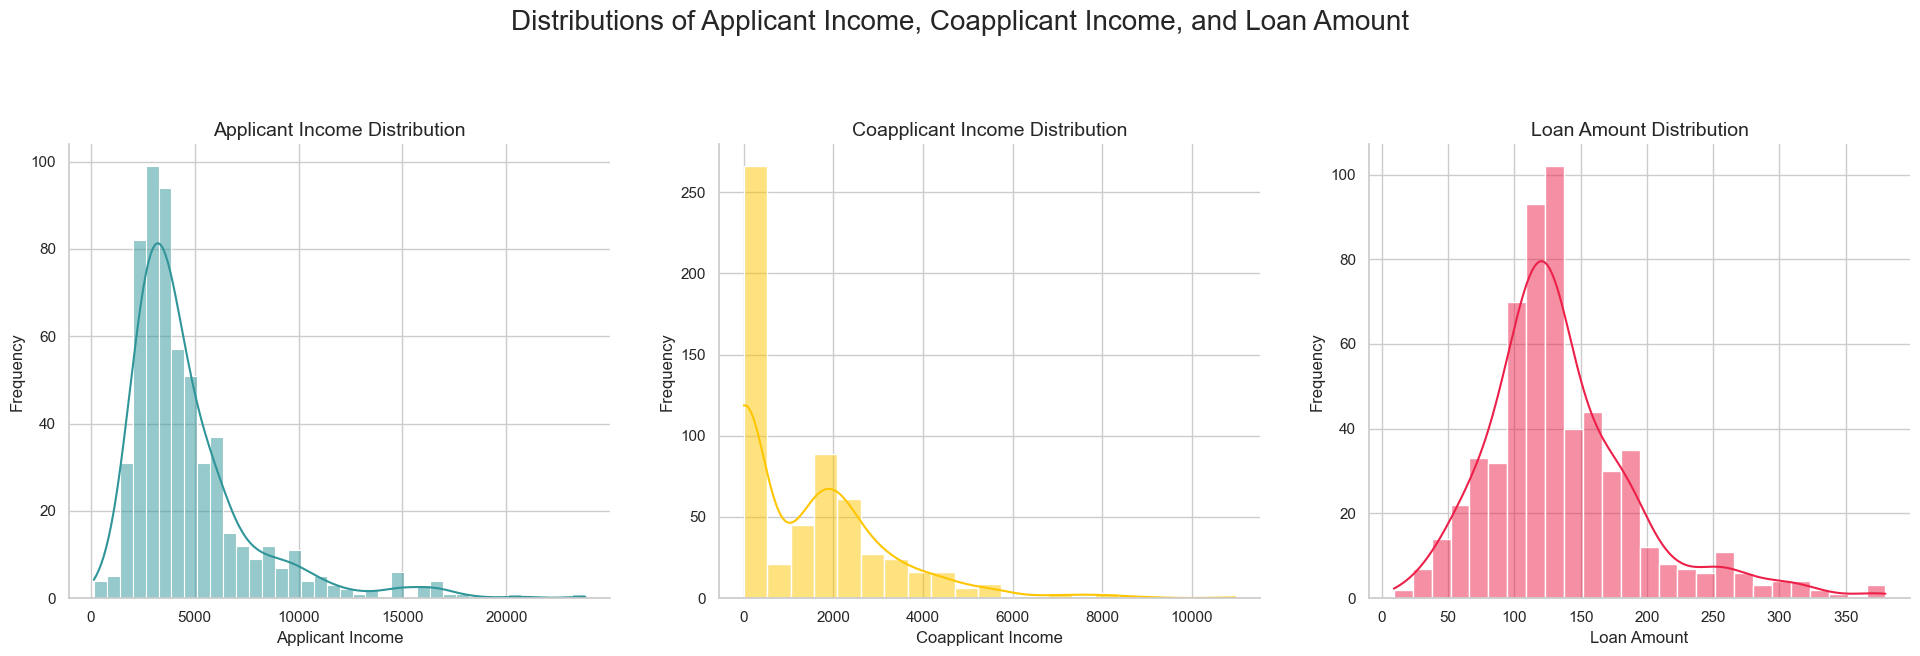

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

colors = ["#2F9599", "#FEC601", "#EC2049"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution', fontsize=14)
axes[0].set_xlabel('Applicant Income', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['CoapplicantIncome'], kde=True, color=colors[1], ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution', fontsize=14)
axes[1].set_xlabel('Coapplicant Income', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Applicant Income, Coapplicant Income, and Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()

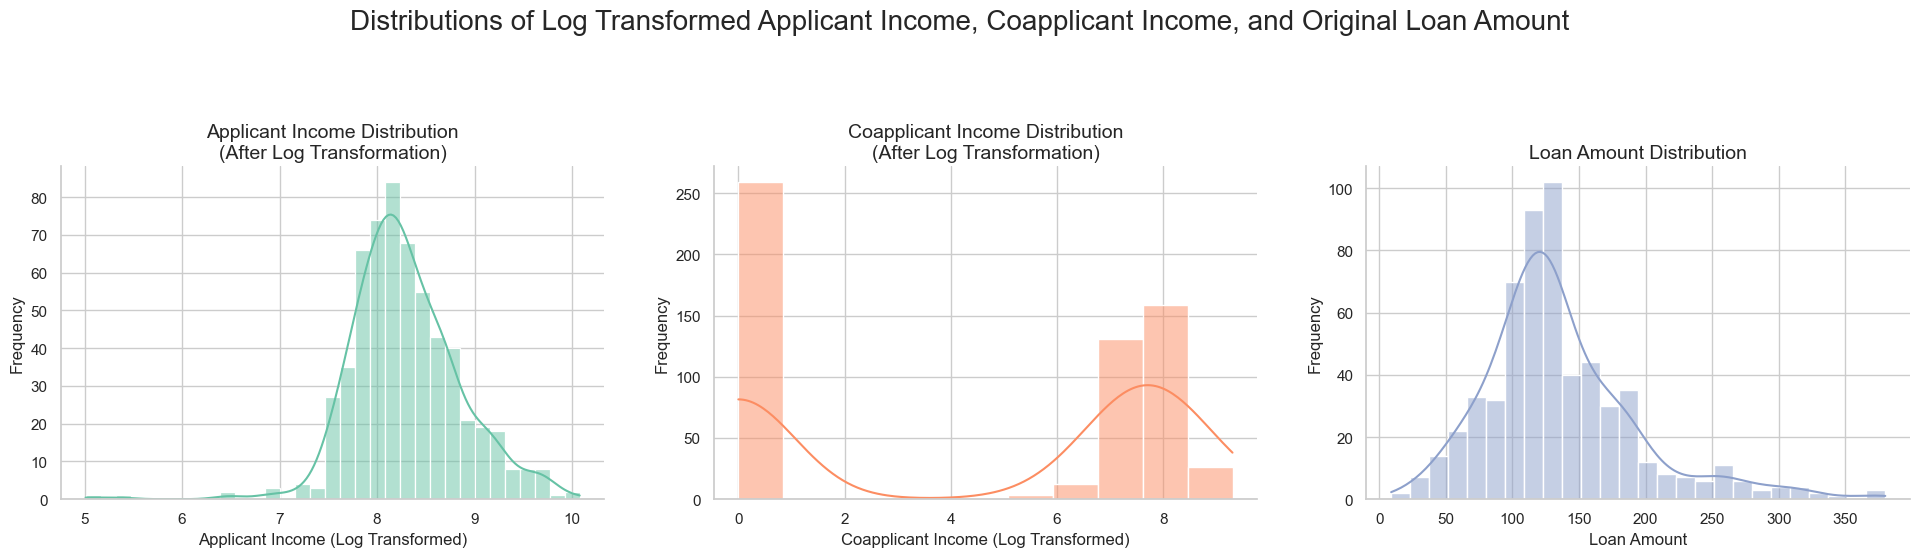

In [37]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution\n(After Log Transformation)', fontsize=14)
axes[0].set_xlabel('Applicant Income (Log Transformed)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['CoapplicantIncome'], kde=True, color=colors[1], ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution\n(After Log Transformation)', fontsize=14)
axes[1].set_xlabel('Coapplicant Income (Log Transformed)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Log Transformed Applicant Income, Coapplicant Income, and Original Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()

In [38]:
df.select_dtypes('object').head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

# BUILD Pipeline

In [39]:
# df.drop(COLUMNS_TO_DROP,axis=1, inplace=True)
target = df.drop([LABEL_KEY_REG],axis=1)
labelreg = df[LABEL_KEY_REG]
labelcat = df[LABEL_KEY_REG]
X_train , X_test,y_train,y_test = train_test_split(target,labelreg , test_size=0.2, random_state=42,)
Xc_train , Xc_test,yc_train,yc_test = train_test_split(target,labelcat , test_size=0.2, random_state=42,)



for i in [X_train , X_test,y_train,y_test]:
    print(i.shape)
print("---")
for i in [Xc_train , Xc_test,yc_train,yc_test]:
    print(i.shape)



(472, 12)
(119, 12)
(472,)
(119,)
---
(472, 12)
(119, 12)
(472,)
(119,)


In [40]:
df


Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           8.674026           0.000000       128.0             360.0   
1           8.430109           7.319202       128.0             360.0   
2           8.006368           0.000000        66.0             360.0   
3           7.856707           7.765993       120.0             360.0   
4           8.699515           0.000000       141.0             360.0   
..               ...                ...         ...               ...   
609         7.972466           0.000000        71.0             360.0   
610         8.320205           0.000000        40.0             180.0   
611         8.996157           5.484797       253.0             360.0   
612         8.933664           0.000000       187.0             360.0   
613         8.430109           0.000000       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[591 rows x 13 columns]

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_results(pipeline, X_test=X_test, y_test=y_test, mtype="reg"):
    """
    Calculate the performance metrics of a pipeline on test data.

    Parameters:
    pipeline (Pipeline): The pipeline to be evaluated.
    X_test (array-like): Test features.
    y_test (array-like): True labels for the test data.
    mtype (str): Model type, 'reg' for regression, 'class' for classification.

    Returns:
    dict: A dictionary containing the pipeline's performance metrics.
    """
    if mtype == 'reg':
        # Predict target values using the pipeline
        y_pred = pipeline.predict(X_test)

        # Calculate regression metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # Get the name of the model
        model_name = type(pipeline.steps[-1][1]).__name__

        return {f"{model_name}": {'MAE': mae, 'MSE': mse, 'R-squared': r_squared}}

    elif mtype == "class":
        X_test=Xc_test
        y_test=yc_test

        # Predict target classes using the pipeline
        y_pred = pipeline.predict(X_test)

        # Calculate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

        f1 = f1_score(y_test, y_pred, average='weighted')

        # Get the name of the model
        model_name = type(pipeline.steps[-1][1]).__name__

        return {f"{model_name}": {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}}

    else:
        raise ValueError("Invalid value for mtype. Use 'reg' for regression or 'class' for classification.")


In [42]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")


#feature scalling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing steps for numerical-categorical features
num_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES),
        ('num_cat', num_categorical_transformer, NUMERICAL_CATEGORICAL_FEATURES)
    ])


    # Create the full pipeline

    # loan amount prediction pipeline
pipe1 = make_pipeline(preprocessor , RandomForestRegressor(10))
pipe2 = make_pipeline(preprocessor , DecisionTreeRegressor())
pipe3 = make_pipeline(preprocessor , LinearRegression())

    # loan status prediction pipeline
pipe4 = make_pipeline(preprocessor , LogisticRegression())
pipe5 = make_pipeline(preprocessor , RandomForestClassifier())
pipe6 = make_pipeline(preprocessor , DecisionTreeClassifier())


In [45]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=10))])

In [46]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [47]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('linearregression', LinearRegression())])

In [48]:
pipe4.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('logisticregression', LogisticRegression())])

In [49]:
pipe5.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [50]:
pipe6.fit(Xc_train,yc_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Credit_History'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [51]:
calculate_results(pipe1 ,mtype="reg")

{'RandomForestRegressor': {'MAE': 36.652941176470584,
  'MSE': 2400.6152100840336,
  'R-squared': 0.2733956119266948}}

In [52]:
calculate_results(pipe2,mtype="reg")

{'DecisionTreeRegressor': {'MAE': 45.78991596638655,
  'MSE': 3875.453781512605,
  'R-squared': -0.17300003415531617}}

In [53]:
calculate_results(pipe3,mtype="reg")

{'LinearRegression': {'MAE': 38.35294117647059,
  'MSE': 2783.109243697479,
  'R-squared': 0.15762452038818087}}

In [54]:
calculate_results(pipe4,mtype="class")


{'LogisticRegression': {'Accuracy': 0.01680672268907563,
  'Precision': 0.7662815126050421,
  'Recall': 0.01680672268907563,
  'F1': 0.002881152460984394}}

In [55]:
calculate_results(pipe5,mtype="class")


{'RandomForestClassifier': {'Accuracy': 0.008403361344537815,
  'Precision': 0.44257703081232497,
  'Recall': 0.008403361344537815,
  'F1': 0.0067226890756302525}}

In [56]:
calculate_results(pipe6,mtype="class")

{'DecisionTreeClassifier': {'Accuracy': 0.0,
  'Precision': 0.48739495798319327,
  'Recall': 0.0,
  'F1': 0.0}}

In [57]:
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           8.674026           0.000000       128.0             360.0   
1           8.430109           7.319202       128.0             360.0   
2           8.006368           0.000000        66.0             360.0   
3           7.856707           7.765993       120.0             360.0   
4           8.699515           0.000000       141.0             360.0   
..               ...                ...         ...               ...   
609         7.972466           0.000000        71.0             360.0   
610         8.320205           0.000000        40.0             180.0   
611         8.996157           5.484797       253.0             360.0   
612         8.933664           0.000000       187.0             360.0   
613         8.430109           0.000000       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[591 rows x 13 columns]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [50, 100, 200, 500],
                     'max_depth' : [5, 10, 15, 20, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}]

rfc = RandomForestClassifier(random_state=42)

clf = GridSearchCV(rfc, tuned_parameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

clf.fit(Xc_train, yc_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
y_true, y_pred = yc_test, clf.predict(Xc_test)
print(classification_report(y_true, y_pred))


Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\vpved\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Define your cross-validation strategy
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Example of using GridSearchCV with the updated cross-validation strategy
grid_search = GridSearchCV(estimator=rfc, param_grid=tuned_parameters, cv=cv)
grid_search.fit(Xc_train, yc_train)

# Calculate performance metrics on test data
results = calculate_results(grid_search.best_estimator_, X_test, yc_test, mtype="class")
print(results)